In [46]:
words = open('names.txt', 'r').read().splitlines()

In [34]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [35]:
len(words)

32033

In [36]:
min(len(w) for w in words)

2

In [37]:
max(len(w) for w in words)

15

## Exploring Bigrams in the dataset


In machine learning and natural language processing, a bigram is a sequence of two adjacent words in a text. Bigrams are often used to analyze text data and build language models.

For example, consider the sentence "**The quick brown fox jumps over the lazy dog.**" The bigrams in this sentence would be:

- The quick
- quick brown
- brown fox
- fox jumps
- jumps over
- over the
- the lazy
- lazy dog

Bigrams can be useful in a variety of natural language processing tasks such as text classification, sentiment analysis, and language generation. By analyzing the frequency of bigrams in a text corpus, we can gain insights into the language patterns and use this information to build more accurate language models.

In our case we are exploring letters instead of words

The following Python code is creating a bigram model for the words in a list called words.

The code first creates an empty dictionary called b. Then, for each of the words in the words list (as specified by words[:n]), the code adds start and end tokens to the word and creates a list of characters called chs. The start token S represents the beginning of the word, while the end token E represents the end of the word.

Next, the code iterates over pairs of adjacent characters in the chs list using the zip function. For each pair of characters, the code creates a tuple called bigram containing the pair of characters, and then adds 1 to the value associated with this bigram in the b dictionary using the get method. The get method returns the current value associated with the bigram, or 0 if the bigram is not yet in the dictionary.

Overall, this code creates a bigram model that counts the frequency of each bigram in the words of the words list. The resulting bigram counts are stored in the b dictionary.

In [38]:
b = {}
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram =(ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        #print(ch1, ch2)

In [39]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [47]:
import torch

This code creates a 28x28 tensor filled with zeros using the PyTorch library. The tensor is assigned to a variable named "N" and has a data type of int32. 

In [48]:
N = torch.zeros((28,28), dtype=torch.int32)

This code takes the list of strings "words" and concatenates them into a single string using the join() method. Then it uses the set() function to extract the unique characters in the concatenated string, and converts the resulting set back into a list using the list() function. Finally, it sorts the list of unique characters in alphabetical order and assigns it to a variable named "chars". essentially giving us the alphabet in order

then we create a dictionary called "stoi" where each unique character in the "chars" list is a key and the corresponding value is the index of that character in the "chars" list. The "enumerate()" function is used to iterate over the "chars" list and returns a tuple for each character that contains its index and value. The code then uses a dictionary comprehension to create the "stoi" dictionary 
after we manually add our start and end values to the dict

In [49]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

we store our bigrams in the matrix using stoi to help us store it in alphabetical order, later we create a plot with matplotlib to help us vizualize it.

In [56]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [57]:
itos = {i:s for s,i in stoi.items()}

In [58]:
import matplotlib.pyplot as plt

when calling "N[i,j]" we need to use .item() otherwise we are returning the tensor not the int

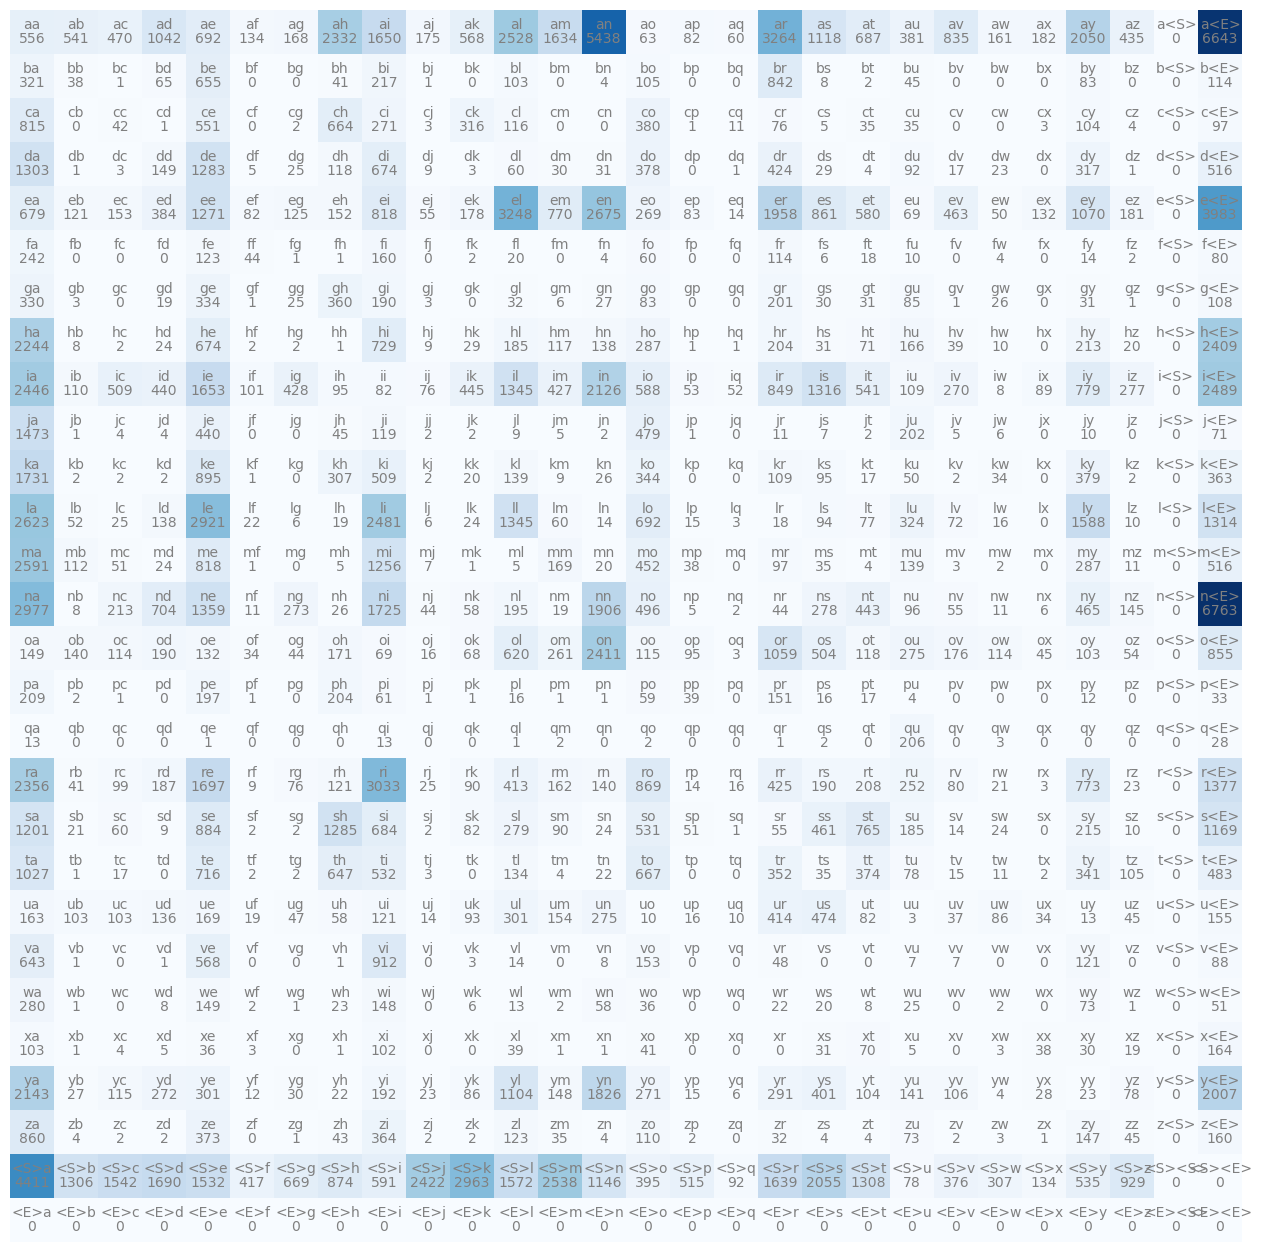

In [60]:
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off');

After this vizualization we realie we are wasting space with the special tokens, look at the last row and you will notice all end tokens are 0, we of course will never start our word with an end token, same reasoning can be apllyied to the start token, so we will for the sake of not wasting space use one token only to designate start and end.

In [61]:
N = torch.zeros((27,27), dtype=torch.int32)

In [62]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [63]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

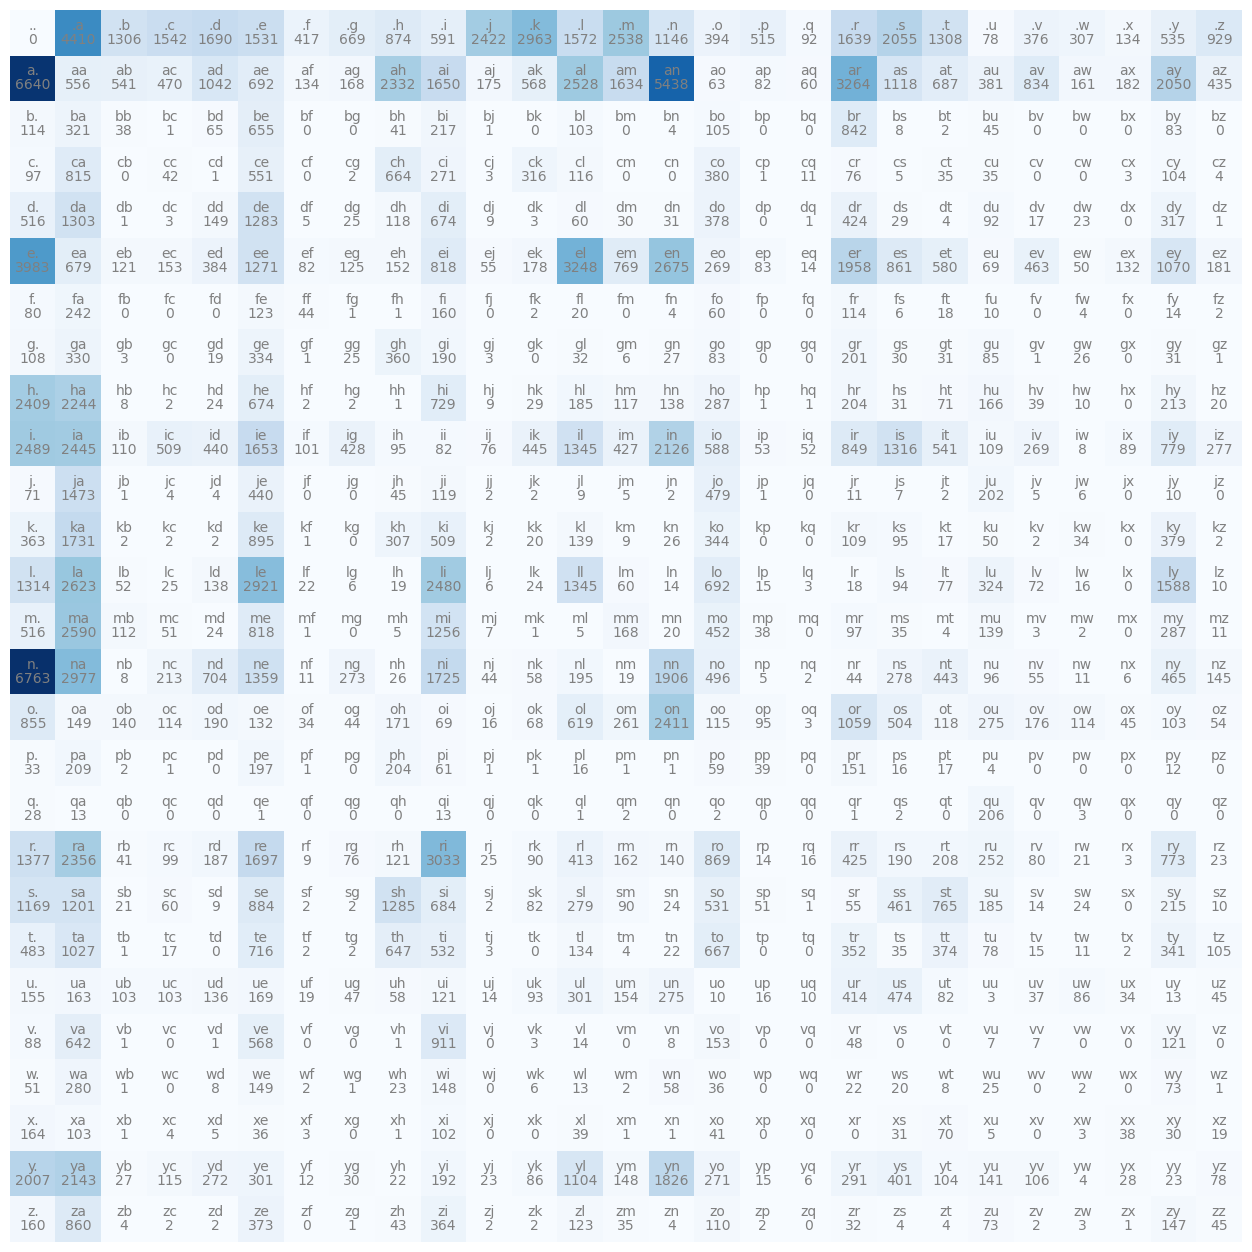

In [64]:
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off');